In [1]:
%autosave 120

Autosaving every 120 seconds


We are going to skip the hard way because we are lazy programmers!

It's there as a resource to understand how the correlation coefficient is calculated.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data

Let's do an example from the mpg dataset.

In [4]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [6]:
mpg.cyl.value_counts()

cyl
4    81
6    79
8    70
5     4
Name: count, dtype: int64

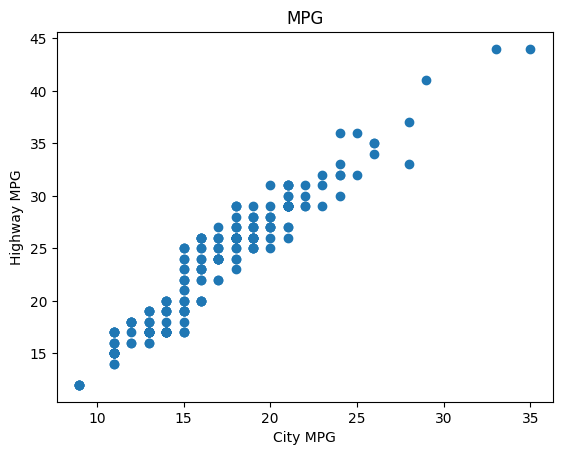

In [19]:
plt.scatter(mpg.cty, mpg.hwy)
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('MPG')
plt.show()

In [25]:
r, p = stats.pearsonr(mpg.cty, mpg.hwy)
r, p

(0.9559159136495713, 1.868307195266694e-125)

The r_value of 0.96 indicates there is a strong, positive correlation between city and highway mpg

In [28]:
def eval_result(p_value, a = 0.05):

    if p_value < a:
        print('Your result is significant!')

    else:
        print('Your result was not significant!')

In [29]:
eval_result(p)

Your result is significant!


Let's look at a limitation of the Pearson's r test with a non-linear relationship.

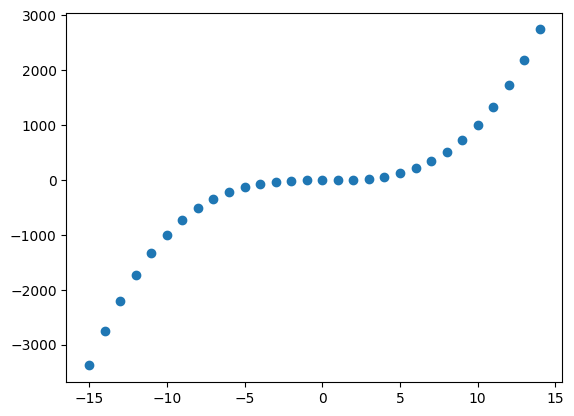

In [36]:
x = list(range(-15, 15, 1))
y =[i ** 3 for i in x]

plt.scatter(x, y)

In [37]:
r_cubed, p_cubed = stats.pearsonr(x, y)
eval_result(p_cubed)

Your result is significant!


In [38]:
r_cubed

0.915178278514944

In [39]:
p_cubed

1.4462375648937077e-12

Let's look at another limitation with a linear relationship that doesn't do much.

(0.0, 75.0)

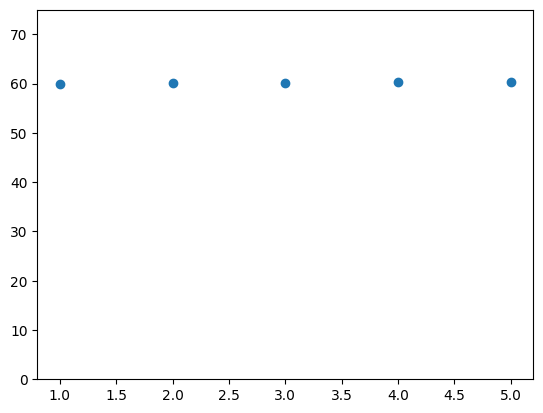

In [42]:
x_not = [1, 2, 3, 4, 5]
y_not = [60, 60.1, 60.2, 60.3, 60.4]

plt.scatter(x_not, y_not)
plt.ylim(0, 75)

In [43]:
r_not, p_not = stats.pearsonr(x_not, y_not)
eval_result(p_not)

Your result is significant!


In [44]:
r_not

0.9999999999999999

Bonus!

In [48]:
def find_correlation(feature_one, feature_two):

    r, p = stats.pearsonr(feature_one, feature_two)

    eval_result(p)

In [49]:
find_correlation(x_not, y_not)

Your result is significant!
